# 5.4

## a)

In [1]:
from sympy import *
from sympy.plotting import plot, plot3d

In [2]:
x1, x2 = var('x1 x2', real=True)

dFdx1 = 0.05*x1*(1-x1/150000)-1e-8*x1*x2-0.03*x1
dFdx2 = 0.08*x2*(1-x2/400000)-1e-8*x1*x2-0.03*x2

In [3]:
s = solve([dFdx1, dFdx2], [x1, x2], rational=True, dict=True)
s

[{x1: 0, x2: 0},
 {x1: 0, x2: 250000},
 {x1: 105000000/1997, x2: 494000000/1997},
 {x1: 60000, x2: 0}]

In [4]:
solucoes = [
    [float(i[x1]) for i in s],
    [float(i[x2]) for i in s]
]
solucoes

[[0.0, 0.0, 52578.86830245368, 60000.0],
 [0.0, 250000.0, 247371.0565848773, 0.0]]

In [5]:
print('x1 em função de x2')
sx1 = solve([dFdx1], [x1], dict=True)
sx1

x1 em função de x2


[{x1: 0.0}, {x1: 60000.0 - 0.03*x2}]

In [6]:
print('x2')
sx2 = dFdx2.subs({x1: sx1[-1][x1]})
display(sx2)
display(simplify(sx2))

x2


0.08*x2*(1 - x2/400000) - 1.0e-8*x2*(60000.0 - 0.03*x2) - 0.03*x2

x2*(0.0494 - 1.997e-7*x2)

<ipython-input-7-8080be7198de>:53: RuntimeWarning: invalid value encountered in true_divide
  plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd')
<ipython-input-7-8080be7198de>:58: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


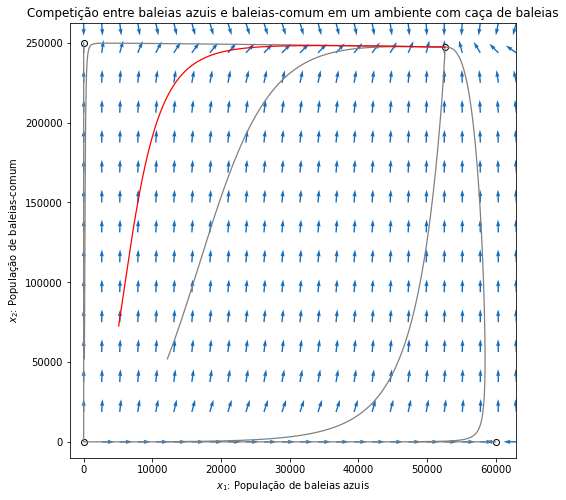

In [7]:
import random
# https://stackoverflow.com/a/18833385/1524997
import matplotlib.pyplot as plt
from scipy.integrate import ode
import numpy as np
plt.rcParams["figure.figsize"] = (8, 8)

fig = plt.figure(num=1)
ax=fig.add_subplot(111)

def vf(t,x):
    x1graf, x2graf = x
    dx=np.zeros(2)

    dx[0] = 0.05*x1graf*(1-x1graf/150000)-1e-8*x1graf*x2graf-0.03*x1graf
    dx[1] = 0.08*x2graf*(1-x2graf/400000)-1e-8*x1graf*x2graf-0.03*x2graf

    return dx

pontos_iniciais = [
    [0, 0], [0, 100], [100, 0],
    [100, max(solucoes[1])/5], [max(solucoes[0])/5, 100], [max(solucoes[0])/5, max(solucoes[1])/5],
    [4*max(solucoes[0])/5, 100],
    [5000, 70000]
]
cores = ['gray' for i in pontos_iniciais]
cores[-1] = 'red'

# Solution curves
t0=0; tEnd=5000; dt=1;
r = ode(vf).set_integrator('vode', method='bdf',max_step=dt)

for p, i in enumerate(pontos_iniciais):
    Y=[];T=[];S=[];
    r.set_initial_value(i, t0).set_f_params()
    while r.successful() and r.t + dt < tEnd:
        r.integrate(r.t+dt)
        Y.append(r.y)

    S = np.array(np.real(Y))
    ax.plot(S[:,0],S[:,1], color=cores[p], lw = 1.25)

maxx1 = max(solucoes[0])*1.05
maxx2 = max(solucoes[1])*1.05

x1graf, x2graf = np.meshgrid(np.linspace(0, maxx1, 25), np.linspace(0, maxx2, 15))

f1 = 0.05*x1graf*(1-x1graf/150000)-1e-8*x1graf*x2graf-0.03*x1graf
f2 = 0.08*x2graf*(1-x2graf/400000)-1e-8*x1graf*x2graf-0.03*x2graf

normalizador = np.sqrt(f1**2+f2**2)

plt.quiver(x1graf, x2graf, f1/normalizador, f2/normalizador, color='#156dbd')

plt.scatter(solucoes[0], solucoes[1], marker='o', edgecolors='black', color='w')


ax = plt.axes()
ax.set_title("Competição entre baleias azuis e baleias-comum em um ambiente com caça de baleias")
ax.set_xlabel('$x_1$: População de baleias azuis')
ax.set_ylabel('$x_2$: População de baleias-comum')
ax.set_xlim([-2000, maxx1])
ax.set_ylim([-10000, maxx2])

plt.show()

## b)

In [8]:
dFdx1x1 = diff(dFdx1, x1)
dFdx2x2 = diff(dFdx2, x2)
dFdx1x2 = diff(dFdx1, x2)
dFdx2x1 = diff(dFdx2, x1)

H = Matrix([
    [dFdx1x1, dFdx1x2],
    [dFdx2x1, dFdx2x2]
])
simplify(H, rational=True)

Matrix([
[-x1/1500000 - x2/100000000 + 1/50,                     -x1/100000000],
[                    -x2/100000000, -x1/100000000 - x2/2500000 + 1/20]])

In [9]:
# https://quickmath.com/webMathematica3/quickmath/equations/solve/advanced.jsp#c=solve_advancedsolveequations&v1=0.05*x*%25281-x%2F150000%2529-10%255E%2528-8%2529*x*y-0.03*x%253D0%250A0.08*y*%25281-y%2F400000%2529-10%255E%2528-8%2529*x*y-0.03*y%253D0%250A%250A&v2=x%250Ay
for solucao in s:
    print('Solução: ', solucao)
    display(simplify(H.subs(solucao), rational=True))
    print('Autovalores: ')
    display(simplify(H.subs(solucao), rational=True).eigenvals())
    print('------------')

Solução:  {x1: 0, x2: 0}


Matrix([
[0.02,    0],
[   0, 0.05]])

Autovalores: 


{0.0200000000000000: 1, 0.0500000000000000: 1}

------------
Solução:  {x1: 0, x2: 250000}


Matrix([
[ 0.0175,     0],
[-0.0025, -0.05]])

Autovalores: 


{0.0175000000000000: 1, -0.0500000000000000: 1}

------------
Solução:  {x1: 105000000/1997, x2: 494000000/1997}


Matrix([
[ -0.0175262894341512, -0.000525788683024537],
[-0.00247371056584877,   -0.0494742113169755]])

Autovalores: 


{-0.0174856296439206: 1, -0.0495148711072061: 1}

------------
Solução:  {x1: 60000, x2: 0}


Matrix([
[-0.02, -0.0006],
[    0,  0.0494]])

Autovalores: 


{-0.0200000000000000: 1, 0.0494000000000000: 1}

------------
